# Step III : Spirale challenge

In this example, the set of coordinates of the points are now separated using two spirals (instead of a line or a parabola as in the previoius examples). Build your own network to properly separate the two sets of data.


Definition of a training data where the two classes are defined by two opposite spirals. The size of the 
training data set is 500. On top of it a Validation data set and a Testing data set are also defined, both of them
being of size 200.

In [ ]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
    
def Training_set_spirale(a,b,N):
    
    n = 0
    Data = np.zeros([N+2400,2])
    Labels = np.zeros([N+2400,1])
      
    for n in range(0,N+2400):
        Theta = random.uniform(0, 10*math.pi)
        l = random.uniform(0, 1)
        p = random.uniform(0, 1)
        r = a*Theta+b;
        
        if l < 0.5 and p < 0.99:
            Labels[n,0] = 0
            Data[n,0] = (r+random.uniform(-.5, .5))*math.cos(r)
            Data[n,1] = (r+random.uniform(-.5, .5))*math.sin(r)
        elif l < 0.5 and p >= 0.99:           
            Labels[n,0] = 1
            Data[n,0] = (r+random.uniform(-.5, .5))*math.cos(r)
            Data[n,1] = (r+random.uniform(-.5, .5))*math.sin(r)
        else : 
            Labels[n,0] = 1
            Data[n,0] = -(r+random.uniform(-.5, .5))*math.cos(r)
            Data[n,1] = -(r+random.uniform(-.5, .5))*math.sin(r)

    Training_data = Data[:N,]
    Training_label = Labels[:N,]
    Validation_data = Data[N:N+200,]
    Validation_label = Labels[N:N+200,]
    Testing_data = Data[N+200:,]
    Testing_label = Labels[N+200:,]
        
    return Training_data, Testing_data, Validation_data, Training_label, Validation_label, Testing_label

def Training_set_clusters(N):
    
    n = 0
    Data = np.zeros([N+400,2])
    Labels = np.zeros([N+400,1])   

The training/validation/testing sets are defined below. The training set is then plot using two different colors
to distinguish the two classes

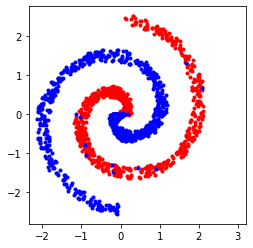

In [ ]:
a = 0.25;
b = 0;
N = 1500; # number of training points
    
Training_data, Testing_data, Validation_data, Training_label, Validation_label, Testing_label = Training_set_spirale(a,b,N) 

E = np.mean(Training_data)
Std = np.std(Training_data)

Training_data = (Training_data-E)/Std
Testing_data = (Testing_data-E)/Std
Validation_data = (Validation_data-E)/Std

X0 = []
X1 = []
Y0 = []
Y1 = []
for n in range(0,N):
    x = Training_data[n,0]
    if Training_label[n]==0:
        X0.append(Training_data[n,0])
        Y0.append(Training_data[n,1])
    else:
        X1.append(Training_data[n,0])
        Y1.append(Training_data[n,1])

         
plt.plot(X0, Y0, 'r.')
plt.plot(X1, Y1, 'b.')
plt.axis('square')
plt.show() 

Define the architecture of the model. You will have to decide how many layers and neurons are necessary to solve this problem. Since we are working with two classes, the activation function is "sigmoid" and the loss function "binary cross-entropy". In the end the distinction between the two classes will be made on the base of whether the output will be below or above 0,5.

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(8,activation='relu', input_shape=(2,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer = optimizers.SGD(lr=2e-3), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_19 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_20 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                

Training of the model. The number of Epoch and the minibatch size are defined below. The results at each iteraction
are saved in order to compare the accuracy calculated for the training set and for the validation set. These data are
saved in the variable history.


In [ ]:
history = model.fit(Training_data,
                    Training_label,
                    epochs = 30,
                    batch_size = 1,
                    validation_data = (Validation_data, Validation_label))

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1169 - accuracy: 0.9633 - val_loss: 0.1021 - val_accuracy: 0.9700
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1125 - accuracy: 0.9687 - val_loss: 0.0976 - val_accuracy: 0.9700
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1047 - accuracy: 0.9693 - val_loss: 0.0916 - val_accuracy: 0.9800
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1088 - accuracy: 0.9673 - val_loss: 0.1621 - val_accuracy: 0.9300
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1051 - accuracy: 0.9713 - val_loss: 0.0703 - val_accuracy: 0.9850
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0961 - accuracy: 0.9733 - val_loss: 0.0813 - val_accuracy: 0.9800
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0969 - accuracy: 0.9727 - val_loss: 0.0638 - val_accuracy:

The accuracy of the model is tested using the testing set of data.

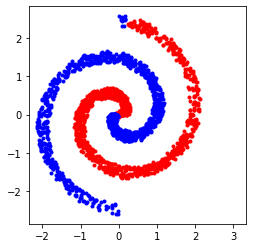

In [ ]:
Results = model.predict(Testing_data)
Length = len(Results)

X0 = []
X1 = []
Y0 = []
Y1 = []
for n in range(0,Length):

    if Results[n]<=0.5:
        X0.append(Testing_data[n,0])
        Y0.append(Testing_data[n,1])
    else:
        X1.append(Testing_data[n,0])
        Y1.append(Testing_data[n,1]) 
        
plt.plot(X0, Y0, 'r.')
plt.plot(X1, Y1, 'b.')
plt.axis('square')
plt.show() 

In the same way, using the model.evaluate function you can test the accuracy of the model when working on the testing
set. The second number returns the average accuracy.

In [ ]:
Predication_accuracy = model.evaluate(Testing_data, Testing_label)
print(Predication_accuracy)

69/69 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.5818
[0.6388360857963562, 0.581818163394928]


Below the accuracy for the training and validation sets are plotted

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


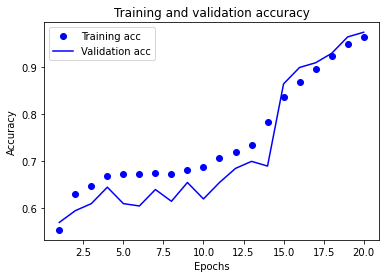

In [ ]:
history_dict = history.history
print( history_dict.keys() )

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

n = len(acc_values)
epochs = range(1, n+1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Below the validation loss for the training and validation sets are plotted

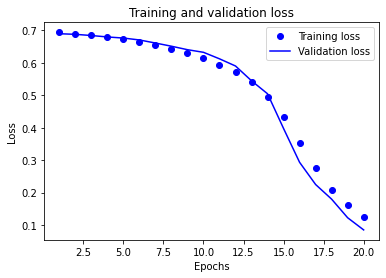

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

A plot is obtained to illustrate how the data are modified by the network in order to classify them.

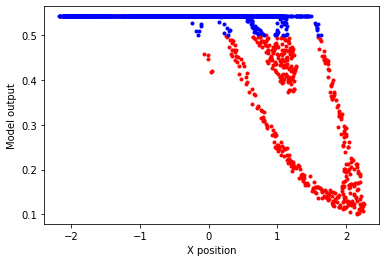

In [ ]:
Results = model.predict(Testing_data)

X0 = []
X1 = []
Y0 = []
Y1 = []
for n in range(0,Length):

    if Results[n]<=0.5:
        X0.append(Results[n])
        Y0.append(Testing_data[n,0])
    else:
        X1.append(Results[n])
        Y1.append(Testing_data[n,0])
        
plt.plot(Y0, X0, 'r.')
plt.plot(Y1, X1, 'b.')
plt.ylabel('Model output')
plt.xlabel('X position')
plt.show()